In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [21]:
var = 'swdn'

In [22]:
files = sorted(glob.glob('/glade/work/mollyw/Projects/c-icesat-2/data/interim/JRA55/postprocessed/mem0*_'+var+'_2011.nc'))

DS = []
for file in files:
    ds = xr.open_dataset(file, decode_times=False)
    DS.append(ds)

In [23]:
ds_2000 = xr.concat(DS, dim='member')
arc = ds_2000.where(ds_2000.latitude > 55).mean(dim=['latitude', 'longitude'])
glo = ds_2000.mean(dim=['latitude', 'longitude'])

file_true = '/glade/work/mollyw/Projects/c-icesat-2/data/interim/JRA55/3hour/JRA.v1.5_'+var+'_3hour_2011.nc'
truth = xr.open_dataset(file_true, decode_times=False)
t_arc = truth.where(truth.latitude > 55).mean(dim=['latitude', 'longitude'])
t_glo = truth.mean(dim=['latitude', 'longitude'])

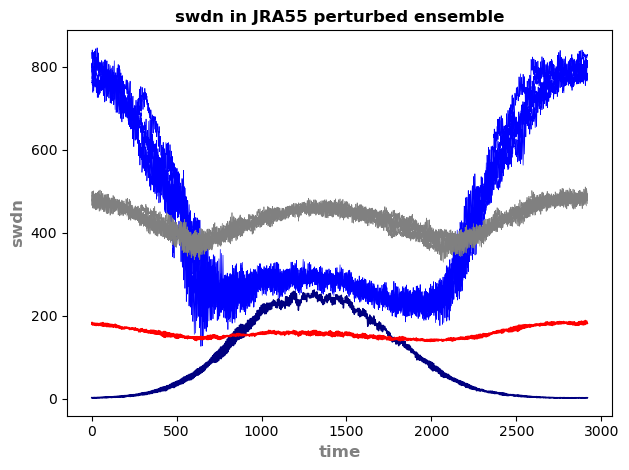

In [24]:
plt.plot(arc[var].transpose(), color = 'blue', lw = 0.5)
plt.plot(glo[var].transpose(), color = 'grey', lw = 0.5)

plt.plot(t_arc[var].transpose(), color = 'navy', lw = 1)
plt.plot(t_glo[var].transpose(), color = 'red', lw = 1)

plt.title(var + ' in JRA55 perturbed ensemble', fontsize = 12, fontweight = 'bold')
plt.ylabel(var, fontsize = 12, fontweight = 'bold', color = 'grey')
plt.xlabel('time', fontsize = 12, fontweight = 'bold', color = 'grey')
plt.tight_layout()